<a href="https://colab.research.google.com/github/Airukua/Word2Vec-Bahasa-Seram-Geser-/blob/main/word2vec_geser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gensim
from gensim.models import Word2Vec
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/korpus_IG13'

In [ ]:
import pandas as pd
df = pd.read_excel(path, header=None)

In [ ]:
geser = df.iloc[:, 1]

In [ ]:
input=geser [1000:].tolist()

In [ ]:
#buat himpunan kata untuk persiapan one hot encoding

hasil = []

for sent in input :
  hasil.extend(sent)

hasil = list(set(hasil))
#urutkan berdasarkan huruf
hasil.sort()
print(hasil)

['Cuma', 'I', 'Matematika', 'SMA', 'a', 'aat', 'ababis', 'abang', 'abi', 'abis', 'ac', 'ade', 'adi', 'adi,', 'afi', 'ahad', 'ahli', 'ainau', 'akar', 'aku', 'akublenga', 'alangulan', 'aljabar', 'alkitab', 'alkitb', 'alu', 'ambon', 'ana', 'anak', 'anaka', 'angelo', 'anggun', 'angin', 'angka', 'angota', 'api', 'ar', 'arlean', 'asal', 'ata', 'atakau', 'atamari', 'atap', 'atara', 'atau', 'aur', 'ayai', 'baba', 'baba,', 'babaan', 'baban', 'babar', 'babotak', 'babotak,', 'badak', 'bae', 'bagadik', 'bagi', 'bagian', 'bagiana', 'bahan', 'bai', 'bail', 'bain', 'bait', 'baita', 'bal', 'bala', 'balajar', 'balanga', 'balemu', 'bali', 'balo-balo', 'balok', 'bandit', 'bangala', 'bangkala', 'bangun', 'bangunan', 'bantu', 'barang', 'baream', 'barenti', 'barsih', 'baru', 'basket', 'bawang', 'bayi', 'beba', 'bebak', 'beda', 'beda-beda', 'bei', 'beila', 'belajar', 'bentuk', 'benu-benu', 'berhasil', 'bersih', 'beruang', 'betina', 'bia', 'biar', 'biasa', 'bibi', 'binatang', 'bingan', 'bini', 'biru', 'bisa',

In [ ]:
table = str.maketrans('', '', '.?!')
x=len(input)

In [ ]:
for i in range(x) :
  input[i] = input[i].translate(table)

In [ ]:
for i in range(x) :
  input [i] = input[i].split()

In [ ]:
#persiapan pelatihan dengan memanggil Word2vec API gensim
from gensim.models.callbacks import CallbackAny2Vec

class callback(CallbackAny2Vec):

    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        print('Nilai loss setelah epoch {}: {}'.format(self.epoch, loss))
        self.epoch += 1

model = Word2Vec(input, sg=1, window=5, size=128, min_count=1, workers=4, iter=1000, sample=0.01)

model.build_vocab(sentences= input, update=True)

model.train(sentences= input, epochs=1000, total_examples=model.corpus_count,compute_loss=True, callbacks=[callback()])

Nilai loss setelah epoch 0: 22776.41015625
Nilai loss setelah epoch 1: 77444.8828125
Nilai loss setelah epoch 2: 100842.8828125
Nilai loss setelah epoch 3: 123659.171875
Nilai loss setelah epoch 4: 146590.171875
Nilai loss setelah epoch 5: 169883.0
Nilai loss setelah epoch 6: 193440.375
Nilai loss setelah epoch 7: 216673.640625
Nilai loss setelah epoch 8: 239462.84375
Nilai loss setelah epoch 9: 262922.6875
Nilai loss setelah epoch 10: 317203.78125
Nilai loss setelah epoch 11: 339957.6875
Nilai loss setelah epoch 12: 362882.40625
Nilai loss setelah epoch 13: 417792.03125
Nilai loss setelah epoch 14: 440840.96875
Nilai loss setelah epoch 15: 464254.34375
Nilai loss setelah epoch 16: 487230.0625
Nilai loss setelah epoch 17: 510348.6875
Nilai loss setelah epoch 18: 564110.75
Nilai loss setelah epoch 19: 587373.625
Nilai loss setelah epoch 20: 609945.375
Nilai loss setelah epoch 21: 632788.4375
Nilai loss setelah epoch 22: 686877.0
Nilai loss setelah epoch 23: 709422.75
Nilai loss setelah 

(23510587, 25709000)

In [ ]:
model.wv.most_similar('nina')

[('baba', 0.7878350019454956),
 ('wowa', 0.6686049103736877),
 ('babotak', 0.6490978598594666),
 ('toi', 0.6105282306671143),
 ('kakak', 0.48968005180358887),
 ('abang', 0.4767167866230011),
 ('wotu', 0.4590310752391815),
 ('ku', 0.41680067777633667),
 ('tuku-', 0.41347646713256836),
 ('loka', 0.4096195101737976)]

In [ ]:
model['nina']

<ipython-input-32-b9e68021b0b2>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  model['nina']


array([-5.6551028e-02, -3.2182604e-01,  3.0522898e-01,  3.2076154e-02,
        5.8344412e-01, -2.4668889e-01,  3.3312493e-03, -4.7514784e-01,
       -1.6944316e-01,  2.4796316e-01, -4.3071967e-01, -7.8304239e-02,
        5.1496422e-01, -1.2816928e-04, -1.0333539e+00,  9.9216998e-01,
       -3.6723796e-01, -1.1483715e+00,  1.3293978e+00, -4.8796207e-01,
       -8.5633016e-01,  3.2507306e-01,  4.3273574e-01, -1.5119125e-01,
        1.7345451e-02,  1.0461289e+00, -6.3859969e-02, -5.6108463e-01,
       -1.0610129e+00,  9.4908094e-03, -6.0985941e-01, -5.5026864e-03,
       -1.7495243e-01,  7.8689955e-02, -2.0107669e-01, -2.7775550e-01,
       -4.3615094e-01, -9.7073115e-02, -5.9113848e-01,  4.6190239e-02,
        4.3783426e-01,  2.6881063e-01,  3.6900181e-01,  6.9514972e-01,
       -3.1834590e-01, -1.0441796e-01, -8.3648764e-02,  2.7778378e-01,
        1.5222895e-01, -4.3559554e-01,  8.5529156e-02,  3.3835176e-01,
       -1.2075745e-01, -2.8880283e-01,  1.2163857e+00,  3.5074320e-01,
      

<ipython-input-31-6e75e80a95e4>:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  koordinat = model[kata]


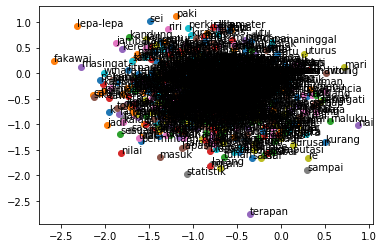

In [ ]:
#visualisasi vektor
import matplotlib.pyplot as plt

for kata in hasil :
  koordinat = model[kata]
  plt.scatter(koordinat[0],koordinat[1])
  plt.annotate(kata,(koordinat[0],koordinat[1]))

In [ ]:
model.save('/content/drive/MyDrive/model saved/w2v-geser.bin')

In [ ]:
model.save("word2vec.Geser")